In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_10degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape(((36*3+1)*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape(((36*3+1)*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(588, 100, 100)


In [17]:
print(y_test.shape)

(66, 100, 100)


In [18]:
print(x_train.shape)

(588, 15, 1)


In [19]:
print(x_test.shape)

(66, 15, 1)


In [20]:
theta_train.shape

(588,)

In [21]:
tsr_train.shape

(588,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((588, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((66, 2, 1))

In [28]:
tsr_theta_train.shape

(588, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
15/15 [==============================] - 1s 5ms/step - loss: 0.0108 - rmse: 0.1032
Epoch 2/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0987
Epoch 3/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0893
Epoch 4/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0846
Epoch 5/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0841
Epoch 6/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 7/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 8/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 9/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 10/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 11/10000
15/15 [=======

15/15 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 85/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0797
Epoch 86/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 87/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 88/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 89/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 90/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 91/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 92/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 93/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 94/10000
15/15 [=============

15/15 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0743
Epoch 168/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0741
Epoch 169/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0740
Epoch 170/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0739
Epoch 171/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 172/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0736
Epoch 173/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0736
Epoch 174/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0736
Epoch 175/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0735
Epoch 176/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 177/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 250/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 251/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 252/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 253/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0640
Epoch 254/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0639
Epoch 255/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0638
Epoch 256/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 257/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 258/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0634
Epoch 259/10000
15/15 [===

15/15 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 332/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 333/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 334/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 335/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0584
Epoch 336/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 337/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 338/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 339/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 340/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0584
Epoch 341/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 414/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 415/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 416/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 417/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 418/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 419/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 420/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0547
Epoch 421/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0546
Epoch 422/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0546
Epoch 423/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 496/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 497/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 498/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 499/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 500/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0510
Epoch 501/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 502/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 503/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0510
Epoch 504/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0509
Epoch 505/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0481
Epoch 578/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0481
Epoch 579/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0480
Epoch 580/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0479
Epoch 581/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0479
Epoch 582/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0479
Epoch 583/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0479
Epoch 584/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0480
Epoch 585/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0478
Epoch 586/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0478
Epoch 587/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 660/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 661/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 662/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 663/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 664/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 665/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 666/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 667/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 668/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 669/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 742/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 743/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 744/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 745/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 746/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 747/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 748/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 749/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 750/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 751/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0406
Epoch 824/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 825/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 826/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 827/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 828/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 829/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 830/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 831/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 832/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 833/10000
15/15 [===

15/15 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0382
Epoch 906/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0383
Epoch 907/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0381
Epoch 908/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0384
Epoch 909/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0383
Epoch 910/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0384
Epoch 911/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0385
Epoch 912/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0385
Epoch 913/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0382
Epoch 914/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0384
Epoch 915/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 988/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 989/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 990/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 991/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 992/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 993/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 994/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 995/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0361
Epoch 996/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 997/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 1070/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 1071/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 1072/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 1073/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 1074/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 1075/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 1076/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1077/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 1078/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1079/10000


15/15 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 1152/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 1153/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 1154/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 1155/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 1156/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 1157/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 1158/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 1159/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 1160/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 1161/10000


15/15 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 1234/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0314
Epoch 1235/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 1236/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 1237/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 1238/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 1239/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 1240/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 1241/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 1242/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0314
Epoch 1243/10000


15/15 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 1316/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 1317/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 1318/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0301
Epoch 1319/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0301
Epoch 1320/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0301
Epoch 1321/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0301
Epoch 1322/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0300
Epoch 1323/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0303
Epoch 1324/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 1325/10000


15/15 [==============================] - 0s 5ms/step - loss: 9.4639e-04 - rmse: 0.0288
Epoch 1396/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.4707e-04 - rmse: 0.0288
Epoch 1397/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6111e-04 - rmse: 0.0291
Epoch 1398/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.4844e-04 - rmse: 0.0289
Epoch 1399/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.5944e-04 - rmse: 0.0291
Epoch 1400/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.7401e-04 - rmse: 0.0293
Epoch 1401/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6338e-04 - rmse: 0.0291
Epoch 1402/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6093e-04 - rmse: 0.0291
Epoch 1403/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.5655e-04 - rmse: 0.0290
Epoch 1404/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.7

15/15 [==============================] - 0s 5ms/step - loss: 9.0062e-04 - rmse: 0.0280
Epoch 1474/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0304e-04 - rmse: 0.0281
Epoch 1475/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0181e-04 - rmse: 0.0280
Epoch 1476/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.1032e-04 - rmse: 0.0282
Epoch 1477/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0271e-04 - rmse: 0.0280
Epoch 1478/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8220e-04 - rmse: 0.0277
Epoch 1479/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0454e-04 - rmse: 0.0281
Epoch 1480/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.2769e-04 - rmse: 0.0285
Epoch 1481/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.2888e-04 - rmse: 0.0285
Epoch 1482/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.2

15/15 [==============================] - 0s 5ms/step - loss: 8.5523e-04 - rmse: 0.0272
Epoch 1552/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6080e-04 - rmse: 0.0273
Epoch 1553/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6186e-04 - rmse: 0.0273
Epoch 1554/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6768e-04 - rmse: 0.0274
Epoch 1555/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.7486e-04 - rmse: 0.0275
Epoch 1556/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.5802e-04 - rmse: 0.0272
Epoch 1557/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.5010e-04 - rmse: 0.0271
Epoch 1558/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3338e-04 - rmse: 0.0268
Epoch 1559/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.2944e-04 - rmse: 0.0267
Epoch 1560/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3

15/15 [==============================] - 0s 5ms/step - loss: 7.9601e-04 - rmse: 0.0261
Epoch 1630/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0970e-04 - rmse: 0.0263
Epoch 1631/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9466e-04 - rmse: 0.0260
Epoch 1632/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0056e-04 - rmse: 0.0261
Epoch 1633/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9561e-04 - rmse: 0.0260
Epoch 1634/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8712e-04 - rmse: 0.0259
Epoch 1635/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9245e-04 - rmse: 0.0260
Epoch 1636/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9886e-04 - rmse: 0.0261
Epoch 1637/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.1573e-04 - rmse: 0.0264
Epoch 1638/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0

15/15 [==============================] - 0s 5ms/step - loss: 7.5454e-04 - rmse: 0.0252
Epoch 1708/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5494e-04 - rmse: 0.0252
Epoch 1709/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6866e-04 - rmse: 0.0255
Epoch 1710/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6483e-04 - rmse: 0.0254
Epoch 1711/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6681e-04 - rmse: 0.0255
Epoch 1712/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6204e-04 - rmse: 0.0254
Epoch 1713/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4708e-04 - rmse: 0.0251
Epoch 1714/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9110e-04 - rmse: 0.0259
Epoch 1715/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.6953e-04 - rmse: 0.0255
Epoch 1716/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4

15/15 [==============================] - 0s 5ms/step - loss: 7.4791e-04 - rmse: 0.0251
Epoch 1786/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4211e-04 - rmse: 0.0250
Epoch 1787/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2450e-04 - rmse: 0.0246
Epoch 1788/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0893e-04 - rmse: 0.0243
Epoch 1789/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2410e-04 - rmse: 0.0246
Epoch 1790/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1105e-04 - rmse: 0.0243
Epoch 1791/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0987e-04 - rmse: 0.0243
Epoch 1792/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0787e-04 - rmse: 0.0243
Epoch 1793/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1700e-04 - rmse: 0.0245
Epoch 1794/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2

15/15 [==============================] - 0s 5ms/step - loss: 6.7898e-04 - rmse: 0.0237
Epoch 1864/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.7453e-04 - rmse: 0.0236
Epoch 1865/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.7422e-04 - rmse: 0.0236
Epoch 1866/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8538e-04 - rmse: 0.0238
Epoch 1867/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9922e-04 - rmse: 0.0241
Epoch 1868/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9430e-04 - rmse: 0.0240
Epoch 1869/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.7602e-04 - rmse: 0.0236
Epoch 1870/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8677e-04 - rmse: 0.0238
Epoch 1871/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8816e-04 - rmse: 0.0239
Epoch 1872/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8

15/15 [==============================] - 0s 5ms/step - loss: 6.3668e-04 - rmse: 0.0228
Epoch 1942/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4427e-04 - rmse: 0.0229
Epoch 1943/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4811e-04 - rmse: 0.0230
Epoch 1944/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4463e-04 - rmse: 0.0229
Epoch 1945/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4448e-04 - rmse: 0.0229
Epoch 1946/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5221e-04 - rmse: 0.0231
Epoch 1947/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6032e-04 - rmse: 0.0233
Epoch 1948/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5766e-04 - rmse: 0.0232
Epoch 1949/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6261e-04 - rmse: 0.0233
Epoch 1950/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5

15/15 [==============================] - 0s 5ms/step - loss: 6.1851e-04 - rmse: 0.0223
Epoch 2020/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1868e-04 - rmse: 0.0223
Epoch 2021/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3500e-04 - rmse: 0.0227
Epoch 2022/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3804e-04 - rmse: 0.0228
Epoch 2023/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2660e-04 - rmse: 0.0225
Epoch 2024/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3901e-04 - rmse: 0.0228
Epoch 2025/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2783e-04 - rmse: 0.0226
Epoch 2026/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1183e-04 - rmse: 0.0222
Epoch 2027/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2776e-04 - rmse: 0.0226
Epoch 2028/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0

15/15 [==============================] - 0s 5ms/step - loss: 5.8586e-04 - rmse: 0.0216
Epoch 2098/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.8659e-04 - rmse: 0.0216
Epoch 2099/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9377e-04 - rmse: 0.0218
Epoch 2100/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9275e-04 - rmse: 0.0218
Epoch 2101/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8933e-04 - rmse: 0.0217
Epoch 2102/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7822e-04 - rmse: 0.0214
Epoch 2103/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8915e-04 - rmse: 0.0217
Epoch 2104/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8736e-04 - rmse: 0.0216
Epoch 2105/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8985e-04 - rmse: 0.0217
Epoch 2106/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8

15/15 [==============================] - 0s 5ms/step - loss: 5.6029e-04 - rmse: 0.0210
Epoch 2176/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7724e-04 - rmse: 0.0214
Epoch 2177/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6583e-04 - rmse: 0.0211
Epoch 2178/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7309e-04 - rmse: 0.0213
Epoch 2179/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8242e-04 - rmse: 0.0215
Epoch 2180/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7680e-04 - rmse: 0.0214
Epoch 2181/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6576e-04 - rmse: 0.0211
Epoch 2182/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6523e-04 - rmse: 0.0211
Epoch 2183/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6137e-04 - rmse: 0.0210
Epoch 2184/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5

15/15 [==============================] - 0s 5ms/step - loss: 5.4779e-04 - rmse: 0.0207
Epoch 2254/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4843e-04 - rmse: 0.0207
Epoch 2255/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5105e-04 - rmse: 0.0208
Epoch 2256/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4682e-04 - rmse: 0.0207
Epoch 2257/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4813e-04 - rmse: 0.0207
Epoch 2258/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7375e-04 - rmse: 0.0213
Epoch 2259/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5137e-04 - rmse: 0.0208
Epoch 2260/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4492e-04 - rmse: 0.0206
Epoch 2261/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4494e-04 - rmse: 0.0206
Epoch 2262/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4

15/15 [==============================] - 0s 5ms/step - loss: 5.3162e-04 - rmse: 0.0203
Epoch 2332/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1790e-04 - rmse: 0.0200
Epoch 2333/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2046e-04 - rmse: 0.0200
Epoch 2334/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1816e-04 - rmse: 0.0200
Epoch 2335/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2542e-04 - rmse: 0.0201
Epoch 2336/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3164e-04 - rmse: 0.0203
Epoch 2337/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.2911e-04 - rmse: 0.0202
Epoch 2338/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3444e-04 - rmse: 0.0204
Epoch 2339/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3334e-04 - rmse: 0.0203
Epoch 2340/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.4

15/15 [==============================] - 0s 5ms/step - loss: 5.1744e-04 - rmse: 0.0199
Epoch 2410/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1118e-04 - rmse: 0.0198
Epoch 2411/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1567e-04 - rmse: 0.0199
Epoch 2412/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0656e-04 - rmse: 0.0197
Epoch 2413/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0187e-04 - rmse: 0.0196
Epoch 2414/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9892e-04 - rmse: 0.0195
Epoch 2415/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9809e-04 - rmse: 0.0195
Epoch 2416/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0432e-04 - rmse: 0.0196
Epoch 2417/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0609e-04 - rmse: 0.0197
Epoch 2418/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0

15/15 [==============================] - 0s 5ms/step - loss: 5.1295e-04 - rmse: 0.0198
Epoch 2488/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0285e-04 - rmse: 0.0196
Epoch 2489/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8494e-04 - rmse: 0.0191
Epoch 2490/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7648e-04 - rmse: 0.0189
Epoch 2491/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7771e-04 - rmse: 0.0189
Epoch 2492/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7334e-04 - rmse: 0.0188
Epoch 2493/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7392e-04 - rmse: 0.0188
Epoch 2494/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.8379e-04 - rmse: 0.0191
Epoch 2495/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8479e-04 - rmse: 0.0191
Epoch 2496/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9

15/15 [==============================] - 0s 6ms/step - loss: 4.6373e-04 - rmse: 0.0186
Epoch 2566/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6916e-04 - rmse: 0.0187
Epoch 2567/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7970e-04 - rmse: 0.0190
Epoch 2568/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7397e-04 - rmse: 0.0188
Epoch 2569/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8014e-04 - rmse: 0.0190
Epoch 2570/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0184e-04 - rmse: 0.0196
Epoch 2571/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0132e-04 - rmse: 0.0195
Epoch 2572/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8516e-04 - rmse: 0.0191
Epoch 2573/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7278e-04 - rmse: 0.0188
Epoch 2574/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7

15/15 [==============================] - 0s 5ms/step - loss: 4.5662e-04 - rmse: 0.0184
Epoch 2644/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4737e-04 - rmse: 0.0181
Epoch 2645/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5460e-04 - rmse: 0.0183
Epoch 2646/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5422e-04 - rmse: 0.0183
Epoch 2647/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5560e-04 - rmse: 0.0183
Epoch 2648/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5373e-04 - rmse: 0.0183
Epoch 2649/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5004e-04 - rmse: 0.0182
Epoch 2650/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4279e-04 - rmse: 0.0180
Epoch 2651/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4080e-04 - rmse: 0.0179
Epoch 2652/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4

15/15 [==============================] - 0s 5ms/step - loss: 4.4191e-04 - rmse: 0.0180
Epoch 2722/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4854e-04 - rmse: 0.0182
Epoch 2723/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2902e-04 - rmse: 0.0176
Epoch 2724/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3681e-04 - rmse: 0.0178
Epoch 2725/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4244e-04 - rmse: 0.0180
Epoch 2726/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3081e-04 - rmse: 0.0177
Epoch 2727/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3642e-04 - rmse: 0.0178
Epoch 2728/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3738e-04 - rmse: 0.0178
Epoch 2729/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2998e-04 - rmse: 0.0176
Epoch 2730/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.3104e-04 - rmse: 0.0177
Epoch 2800/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4032e-04 - rmse: 0.0179
Epoch 2801/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3076e-04 - rmse: 0.0177
Epoch 2802/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2831e-04 - rmse: 0.0176
Epoch 2803/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2633e-04 - rmse: 0.0175
Epoch 2804/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3389e-04 - rmse: 0.0178
Epoch 2805/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4262e-04 - rmse: 0.0180
Epoch 2806/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5108e-04 - rmse: 0.0182
Epoch 2807/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3203e-04 - rmse: 0.0177
Epoch 2808/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.1867e-04 - rmse: 0.0173
Epoch 2878/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2255e-04 - rmse: 0.0174
Epoch 2879/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1761e-04 - rmse: 0.0173
Epoch 2880/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2966e-04 - rmse: 0.0176
Epoch 2881/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3437e-04 - rmse: 0.0178
Epoch 2882/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3748e-04 - rmse: 0.0179
Epoch 2883/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3271e-04 - rmse: 0.0177
Epoch 2884/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1184e-04 - rmse: 0.0171
Epoch 2885/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1338e-04 - rmse: 0.0172
Epoch 2886/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.0145e-04 - rmse: 0.0168
Epoch 2956/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1286e-04 - rmse: 0.0172
Epoch 2957/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1178e-04 - rmse: 0.0171
Epoch 2958/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0669e-04 - rmse: 0.0170
Epoch 2959/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9941e-04 - rmse: 0.0168
Epoch 2960/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9388e-04 - rmse: 0.0166
Epoch 2961/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9575e-04 - rmse: 0.0167
Epoch 2962/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9934e-04 - rmse: 0.0168
Epoch 2963/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0630e-04 - rmse: 0.0170
Epoch 2964/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 4.0015e-04 - rmse: 0.0168
Epoch 3034/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9897e-04 - rmse: 0.0168
Epoch 3035/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0758e-04 - rmse: 0.0170
Epoch 3036/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2275e-04 - rmse: 0.0175
Epoch 3037/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2078e-04 - rmse: 0.0174
Epoch 3038/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0921e-04 - rmse: 0.0171
Epoch 3039/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9832e-04 - rmse: 0.0168
Epoch 3040/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9620e-04 - rmse: 0.0167
Epoch 3041/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0060e-04 - rmse: 0.0168
Epoch 3042/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.9907e-04 - rmse: 0.0168
Epoch 3112/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9184e-04 - rmse: 0.0166
Epoch 3113/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8652e-04 - rmse: 0.0164
Epoch 3114/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9548e-04 - rmse: 0.0167
Epoch 3115/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8506e-04 - rmse: 0.0164
Epoch 3116/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8183e-04 - rmse: 0.0163
Epoch 3117/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9800e-04 - rmse: 0.0168
Epoch 3118/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9225e-04 - rmse: 0.0166
Epoch 3119/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8575e-04 - rmse: 0.0164
Epoch 3120/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.7040e-04 - rmse: 0.0159
Epoch 3190/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6583e-04 - rmse: 0.0158
Epoch 3191/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.7715e-04 - rmse: 0.0161
Epoch 3192/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.7234e-04 - rmse: 0.0160
Epoch 3193/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6901e-04 - rmse: 0.0159
Epoch 3194/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.7531e-04 - rmse: 0.0161
Epoch 3195/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8671e-04 - rmse: 0.0164
Epoch 3196/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.7653e-04 - rmse: 0.0161
Epoch 3197/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.7102e-04 - rmse: 0.0159
Epoch 3198/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6

15/15 [==============================] - 0s 5ms/step - loss: 3.6559e-04 - rmse: 0.0158
Epoch 3268/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6556e-04 - rmse: 0.0158
Epoch 3269/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6480e-04 - rmse: 0.0158
Epoch 3270/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.7579e-04 - rmse: 0.0161
Epoch 3271/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6784e-04 - rmse: 0.0158
Epoch 3272/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6736e-04 - rmse: 0.0158
Epoch 3273/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.5157e-04 - rmse: 0.0153
Epoch 3274/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5272e-04 - rmse: 0.0154
Epoch 3275/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6382e-04 - rmse: 0.0157
Epoch 3276/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.6

15/15 [==============================] - 0s 5ms/step - loss: 3.5462e-04 - rmse: 0.0154
Epoch 3346/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4913e-04 - rmse: 0.0153
Epoch 3347/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4946e-04 - rmse: 0.0153
Epoch 3348/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5977e-04 - rmse: 0.0156
Epoch 3349/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5557e-04 - rmse: 0.0155
Epoch 3350/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5347e-04 - rmse: 0.0154
Epoch 3351/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5640e-04 - rmse: 0.0155
Epoch 3352/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5911e-04 - rmse: 0.0156
Epoch 3353/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5764e-04 - rmse: 0.0155
Epoch 3354/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6

15/15 [==============================] - 0s 5ms/step - loss: 3.4359e-04 - rmse: 0.0151
Epoch 3424/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5573e-04 - rmse: 0.0155
Epoch 3425/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5453e-04 - rmse: 0.0154
Epoch 3426/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5766e-04 - rmse: 0.0155
Epoch 3427/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6118e-04 - rmse: 0.0157
Epoch 3428/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.6397e-04 - rmse: 0.0157
Epoch 3429/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5540e-04 - rmse: 0.0155
Epoch 3430/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5268e-04 - rmse: 0.0154
Epoch 3431/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4311e-04 - rmse: 0.0151
Epoch 3432/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4

15/15 [==============================] - 0s 5ms/step - loss: 3.5964e-04 - rmse: 0.0156
Epoch 3502/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4880e-04 - rmse: 0.0153
Epoch 3503/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.3814e-04 - rmse: 0.0149
Epoch 3504/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.3980e-04 - rmse: 0.0150
Epoch 3505/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.3975e-04 - rmse: 0.0150
Epoch 3506/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4550e-04 - rmse: 0.0152
Epoch 3507/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.3489e-04 - rmse: 0.0148
Epoch 3508/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.3476e-04 - rmse: 0.0148
Epoch 3509/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4322e-04 - rmse: 0.0151
Epoch 3510/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4

15/15 [==============================] - 0s 5ms/step - loss: 3.2762e-04 - rmse: 0.0146
Epoch 3580/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2983e-04 - rmse: 0.0147
Epoch 3581/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2988e-04 - rmse: 0.0147
Epoch 3582/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.3216e-04 - rmse: 0.0147
Epoch 3583/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.3110e-04 - rmse: 0.0147
Epoch 3584/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2691e-04 - rmse: 0.0146
Epoch 3585/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.3217e-04 - rmse: 0.0147
Epoch 3586/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2749e-04 - rmse: 0.0146
Epoch 3587/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.3227e-04 - rmse: 0.0147
Epoch 3588/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2

15/15 [==============================] - 0s 5ms/step - loss: 3.2207e-04 - rmse: 0.0144
Epoch 3658/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2584e-04 - rmse: 0.0145
Epoch 3659/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2990e-04 - rmse: 0.0147
Epoch 3660/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2256e-04 - rmse: 0.0144
Epoch 3661/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2665e-04 - rmse: 0.0146
Epoch 3662/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2684e-04 - rmse: 0.0146
Epoch 3663/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.3254e-04 - rmse: 0.0148
Epoch 3664/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.3495e-04 - rmse: 0.0148
Epoch 3665/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2928e-04 - rmse: 0.0147
Epoch 3666/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1

15/15 [==============================] - 0s 5ms/step - loss: 3.2138e-04 - rmse: 0.0144
Epoch 3736/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2791e-04 - rmse: 0.0146
Epoch 3737/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1839e-04 - rmse: 0.0143
Epoch 3738/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0722e-04 - rmse: 0.0139
Epoch 3739/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0157e-04 - rmse: 0.0137
Epoch 3740/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1864e-04 - rmse: 0.0143
Epoch 3741/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2844e-04 - rmse: 0.0146
Epoch 3742/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2086e-04 - rmse: 0.0144
Epoch 3743/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1645e-04 - rmse: 0.0142
Epoch 3744/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1

15/15 [==============================] - 0s 5ms/step - loss: 3.2714e-04 - rmse: 0.0146
Epoch 3814/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0777e-04 - rmse: 0.0139
Epoch 3815/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.1026e-04 - rmse: 0.0140
Epoch 3816/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1758e-04 - rmse: 0.0143
Epoch 3817/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1407e-04 - rmse: 0.0142
Epoch 3818/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0303e-04 - rmse: 0.0138
Epoch 3819/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0272e-04 - rmse: 0.0137
Epoch 3820/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0552e-04 - rmse: 0.0138
Epoch 3821/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1043e-04 - rmse: 0.0140
Epoch 3822/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1

15/15 [==============================] - 0s 5ms/step - loss: 3.0462e-04 - rmse: 0.0138
Epoch 3892/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2468e-04 - rmse: 0.0145
Epoch 3893/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1584e-04 - rmse: 0.0142
Epoch 3894/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0898e-04 - rmse: 0.0140
Epoch 3895/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0862e-04 - rmse: 0.0140
Epoch 3896/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1819e-04 - rmse: 0.0143
Epoch 3897/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2023e-04 - rmse: 0.0144
Epoch 3898/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1584e-04 - rmse: 0.0142
Epoch 3899/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1018e-04 - rmse: 0.0140
Epoch 3900/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0

15/15 [==============================] - 0s 5ms/step - loss: 2.9803e-04 - rmse: 0.0136
Epoch 3970/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9556e-04 - rmse: 0.0135
Epoch 3971/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.9975e-04 - rmse: 0.0137
Epoch 3972/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0776e-04 - rmse: 0.0140
Epoch 3973/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9675e-04 - rmse: 0.0136
Epoch 3974/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0376e-04 - rmse: 0.0138
Epoch 3975/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.1009e-04 - rmse: 0.0140
Epoch 3976/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1904e-04 - rmse: 0.0144
Epoch 3977/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0092e-04 - rmse: 0.0137
Epoch 3978/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1

15/15 [==============================] - 0s 5ms/step - loss: 3.0220e-04 - rmse: 0.0138
Epoch 4048/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9684e-04 - rmse: 0.0136
Epoch 4049/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0206e-04 - rmse: 0.0138
Epoch 4050/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9907e-04 - rmse: 0.0137
Epoch 4051/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9522e-04 - rmse: 0.0135
Epoch 4052/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9947e-04 - rmse: 0.0137
Epoch 4053/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9804e-04 - rmse: 0.0136
Epoch 4054/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.0639e-04 - rmse: 0.0139
Epoch 4055/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.9725e-04 - rmse: 0.0136
Epoch 4056/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9

15/15 [==============================] - 0s 5ms/step - loss: 2.8803e-04 - rmse: 0.0133
Epoch 4126/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8955e-04 - rmse: 0.0133
Epoch 4127/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8949e-04 - rmse: 0.0133
Epoch 4128/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9531e-04 - rmse: 0.0135
Epoch 4129/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9096e-04 - rmse: 0.0134
Epoch 4130/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8328e-04 - rmse: 0.0131
Epoch 4131/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8621e-04 - rmse: 0.0132
Epoch 4132/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8295e-04 - rmse: 0.0131
Epoch 4133/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8862e-04 - rmse: 0.0133
Epoch 4134/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9

15/15 [==============================] - 0s 6ms/step - loss: 2.8715e-04 - rmse: 0.0133
Epoch 4204/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9074e-04 - rmse: 0.0134
Epoch 4205/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9278e-04 - rmse: 0.0135
Epoch 4206/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8880e-04 - rmse: 0.0133
Epoch 4207/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8211e-04 - rmse: 0.0131
Epoch 4208/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8032e-04 - rmse: 0.0130
Epoch 4209/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8154e-04 - rmse: 0.0130
Epoch 4210/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8458e-04 - rmse: 0.0132
Epoch 4211/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8501e-04 - rmse: 0.0132
Epoch 4212/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8

15/15 [==============================] - 0s 5ms/step - loss: 2.8626e-04 - rmse: 0.0132
Epoch 4282/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8894e-04 - rmse: 0.0133
Epoch 4283/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8491e-04 - rmse: 0.0132
Epoch 4284/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9442e-04 - rmse: 0.0135
Epoch 4285/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.9081e-04 - rmse: 0.0134
Epoch 4286/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.8722e-04 - rmse: 0.0133
Epoch 4287/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8307e-04 - rmse: 0.0131
Epoch 4288/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.7707e-04 - rmse: 0.0129
Epoch 4289/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8186e-04 - rmse: 0.0131
Epoch 4290/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8

15/15 [==============================] - 0s 5ms/step - loss: 2.7810e-04 - rmse: 0.0129
Epoch 4360/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8523e-04 - rmse: 0.0132
Epoch 4361/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8437e-04 - rmse: 0.0132
Epoch 4362/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7914e-04 - rmse: 0.0130
Epoch 4363/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8339e-04 - rmse: 0.0131
Epoch 4364/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8554e-04 - rmse: 0.0132
Epoch 4365/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7360e-04 - rmse: 0.0128
Epoch 4366/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8316e-04 - rmse: 0.0131
Epoch 4367/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8750e-04 - rmse: 0.0133
Epoch 4368/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8

15/15 [==============================] - 0s 5ms/step - loss: 2.7549e-04 - rmse: 0.0129
Epoch 4438/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7147e-04 - rmse: 0.0127
Epoch 4439/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7303e-04 - rmse: 0.0128
Epoch 4440/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7484e-04 - rmse: 0.0128
Epoch 4441/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7369e-04 - rmse: 0.0128
Epoch 4442/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9568e-04 - rmse: 0.0136
Epoch 4443/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8811e-04 - rmse: 0.0133
Epoch 4444/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7537e-04 - rmse: 0.0129
Epoch 4445/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8036e-04 - rmse: 0.0130
Epoch 4446/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7

15/15 [==============================] - 0s 5ms/step - loss: 2.6870e-04 - rmse: 0.0126
Epoch 4516/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7156e-04 - rmse: 0.0127
Epoch 4517/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7074e-04 - rmse: 0.0127
Epoch 4518/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6738e-04 - rmse: 0.0126
Epoch 4519/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7086e-04 - rmse: 0.0127
Epoch 4520/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8415e-04 - rmse: 0.0132
Epoch 4521/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8284e-04 - rmse: 0.0132
Epoch 4522/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7227e-04 - rmse: 0.0128
Epoch 4523/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6907e-04 - rmse: 0.0126
Epoch 4524/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6

15/15 [==============================] - 0s 5ms/step - loss: 2.7248e-04 - rmse: 0.0128
Epoch 4594/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7487e-04 - rmse: 0.0129
Epoch 4595/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7144e-04 - rmse: 0.0127
Epoch 4596/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7154e-04 - rmse: 0.0127
Epoch 4597/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7041e-04 - rmse: 0.0127
Epoch 4598/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7953e-04 - rmse: 0.0131
Epoch 4599/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8204e-04 - rmse: 0.0131
Epoch 4600/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7695e-04 - rmse: 0.0130
Epoch 4601/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7255e-04 - rmse: 0.0128
Epoch 4602/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7

15/15 [==============================] - 0s 6ms/step - loss: 2.7924e-04 - rmse: 0.0131
Epoch 4672/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8611e-04 - rmse: 0.0133
Epoch 4673/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.6421e-04 - rmse: 0.0125
Epoch 4674/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6170e-04 - rmse: 0.0124
Epoch 4675/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6316e-04 - rmse: 0.0124
Epoch 4676/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6435e-04 - rmse: 0.0125
Epoch 4677/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6292e-04 - rmse: 0.0124
Epoch 4678/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6570e-04 - rmse: 0.0125
Epoch 4679/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5687e-04 - rmse: 0.0122
Epoch 4680/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6

15/15 [==============================] - 0s 5ms/step - loss: 2.7541e-04 - rmse: 0.0129
Epoch 4750/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8198e-04 - rmse: 0.0132
Epoch 4751/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9458e-04 - rmse: 0.0137
Epoch 4752/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9074e-04 - rmse: 0.0135
Epoch 4753/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8302e-04 - rmse: 0.0132
Epoch 4754/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7724e-04 - rmse: 0.0130
Epoch 4755/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7690e-04 - rmse: 0.0130
Epoch 4756/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7120e-04 - rmse: 0.0128
Epoch 4757/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6644e-04 - rmse: 0.0126
Epoch 4758/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.7

15/15 [==============================] - 0s 5ms/step - loss: 2.6122e-04 - rmse: 0.0124
Epoch 4828/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5948e-04 - rmse: 0.0123
Epoch 4829/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5815e-04 - rmse: 0.0123
Epoch 4830/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6653e-04 - rmse: 0.0126
Epoch 4831/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7211e-04 - rmse: 0.0128
Epoch 4832/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6387e-04 - rmse: 0.0125
Epoch 4833/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6534e-04 - rmse: 0.0126
Epoch 4834/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6719e-04 - rmse: 0.0126
Epoch 4835/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5935e-04 - rmse: 0.0123
Epoch 4836/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6

15/15 [==============================] - 0s 5ms/step - loss: 2.5444e-04 - rmse: 0.0121
Epoch 4906/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6033e-04 - rmse: 0.0124
Epoch 4907/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6542e-04 - rmse: 0.0126
Epoch 4908/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6377e-04 - rmse: 0.0125
Epoch 4909/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7558e-04 - rmse: 0.0130
Epoch 4910/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6556e-04 - rmse: 0.0126
Epoch 4911/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6238e-04 - rmse: 0.0125
Epoch 4912/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5314e-04 - rmse: 0.0121
Epoch 4913/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5940e-04 - rmse: 0.0123
Epoch 4914/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6

15/15 [==============================] - 0s 6ms/step - loss: 2.5821e-04 - rmse: 0.0123
Epoch 4984/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5760e-04 - rmse: 0.0123
Epoch 4985/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5419e-04 - rmse: 0.0121
Epoch 4986/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5105e-04 - rmse: 0.0120
Epoch 4987/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5702e-04 - rmse: 0.0123
Epoch 4988/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6648e-04 - rmse: 0.0126
Epoch 4989/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7097e-04 - rmse: 0.0128
Epoch 4990/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6683e-04 - rmse: 0.0127
Epoch 4991/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5556e-04 - rmse: 0.0122
Epoch 4992/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4

15/15 [==============================] - 0s 5ms/step - loss: 2.4891e-04 - rmse: 0.0119
Epoch 5062/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4725e-04 - rmse: 0.0119
Epoch 5063/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4494e-04 - rmse: 0.0118
Epoch 5064/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4709e-04 - rmse: 0.0119
Epoch 5065/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5762e-04 - rmse: 0.0123
Epoch 5066/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5350e-04 - rmse: 0.0121
Epoch 5067/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5382e-04 - rmse: 0.0121
Epoch 5068/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5127e-04 - rmse: 0.0120
Epoch 5069/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5543e-04 - rmse: 0.0122
Epoch 5070/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5

15/15 [==============================] - 0s 5ms/step - loss: 2.4105e-04 - rmse: 0.0116
Epoch 5140/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3733e-04 - rmse: 0.0115
Epoch 5141/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4759e-04 - rmse: 0.0119
Epoch 5142/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5586e-04 - rmse: 0.0122
Epoch 5143/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5075e-04 - rmse: 0.0120
Epoch 5144/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4025e-04 - rmse: 0.0116
Epoch 5145/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3785e-04 - rmse: 0.0115
Epoch 5146/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4195e-04 - rmse: 0.0117
Epoch 5147/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.4130e-04 - rmse: 0.0116
Epoch 5148/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.3

15/15 [==============================] - 0s 5ms/step - loss: 2.6076e-04 - rmse: 0.0125
Epoch 5218/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6802e-04 - rmse: 0.0128
Epoch 5219/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5557e-04 - rmse: 0.0123
Epoch 5220/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4631e-04 - rmse: 0.0119
Epoch 5221/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4195e-04 - rmse: 0.0117
Epoch 5222/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4126e-04 - rmse: 0.0117
Epoch 5223/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4347e-04 - rmse: 0.0118
Epoch 5224/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3823e-04 - rmse: 0.0115
Epoch 5225/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3858e-04 - rmse: 0.0115
Epoch 5226/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4

15/15 [==============================] - 0s 5ms/step - loss: 2.3969e-04 - rmse: 0.0116
Epoch 5296/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5061e-04 - rmse: 0.0121
Epoch 5297/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5070e-04 - rmse: 0.0121
Epoch 5298/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5805e-04 - rmse: 0.0124
Epoch 5299/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6914e-04 - rmse: 0.0128
Epoch 5300/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4942e-04 - rmse: 0.0120
Epoch 5301/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7814e-04 - rmse: 0.0132
Epoch 5302/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9382e-04 - rmse: 0.0137
Epoch 5303/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6087e-04 - rmse: 0.0125
Epoch 5304/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5

15/15 [==============================] - 0s 5ms/step - loss: 2.4330e-04 - rmse: 0.0118
Epoch 5374/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4499e-04 - rmse: 0.0119
Epoch 5375/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5316e-04 - rmse: 0.0122
Epoch 5376/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5665e-04 - rmse: 0.0123
Epoch 5377/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5010e-04 - rmse: 0.0121
Epoch 5378/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5094e-04 - rmse: 0.0121
Epoch 5379/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5607e-04 - rmse: 0.0123
Epoch 5380/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4110e-04 - rmse: 0.0117
Epoch 5381/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3395e-04 - rmse: 0.0114
Epoch 5382/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3

15/15 [==============================] - 0s 5ms/step - loss: 2.4088e-04 - rmse: 0.0117
Epoch 5452/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4913e-04 - rmse: 0.0120
Epoch 5453/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5835e-04 - rmse: 0.0124
Epoch 5454/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5970e-04 - rmse: 0.0125
Epoch 5455/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.5756e-04 - rmse: 0.0124
Epoch 5456/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5563e-04 - rmse: 0.0123
Epoch 5457/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5081e-04 - rmse: 0.0121
Epoch 5458/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4408e-04 - rmse: 0.0118
Epoch 5459/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4864e-04 - rmse: 0.0120
Epoch 5460/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3

15/15 [==============================] - 0s 5ms/step - loss: 2.2707e-04 - rmse: 0.0111
Epoch 5530/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3035e-04 - rmse: 0.0113
Epoch 5531/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4579e-04 - rmse: 0.0119
Epoch 5532/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4746e-04 - rmse: 0.0120
Epoch 5533/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3739e-04 - rmse: 0.0116
Epoch 5534/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3638e-04 - rmse: 0.0115
Epoch 5535/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2896e-04 - rmse: 0.0112
Epoch 5536/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3330e-04 - rmse: 0.0114
Epoch 5537/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3198e-04 - rmse: 0.0113
Epoch 5538/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3

15/15 [==============================] - 0s 5ms/step - loss: 2.3497e-04 - rmse: 0.0115
Epoch 5608/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5526e-04 - rmse: 0.0123
Epoch 5609/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6864e-04 - rmse: 0.0129
Epoch 5610/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6215e-04 - rmse: 0.0126
Epoch 5611/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4366e-04 - rmse: 0.0119
Epoch 5612/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3845e-04 - rmse: 0.0116
Epoch 5613/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3202e-04 - rmse: 0.0114
Epoch 5614/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3371e-04 - rmse: 0.0114
Epoch 5615/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2920e-04 - rmse: 0.0112
Epoch 5616/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4

15/15 [==============================] - 0s 5ms/step - loss: 2.2071e-04 - rmse: 0.0109
Epoch 5686/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2443e-04 - rmse: 0.0110
Epoch 5687/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2536e-04 - rmse: 0.0111
Epoch 5688/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2331e-04 - rmse: 0.0110
Epoch 5689/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2422e-04 - rmse: 0.0110
Epoch 5690/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3416e-04 - rmse: 0.0115
Epoch 5691/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4250e-04 - rmse: 0.0118
Epoch 5692/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3593e-04 - rmse: 0.0115
Epoch 5693/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3636e-04 - rmse: 0.0116
Epoch 5694/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.3

15/15 [==============================] - 0s 5ms/step - loss: 2.4875e-04 - rmse: 0.0121
Epoch 5764/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4318e-04 - rmse: 0.0119
Epoch 5765/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4365e-04 - rmse: 0.0119
Epoch 5766/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.3409e-04 - rmse: 0.0115
Epoch 5767/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4543e-04 - rmse: 0.0120
Epoch 5768/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3363e-04 - rmse: 0.0115
Epoch 5769/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2845e-04 - rmse: 0.0112
Epoch 5770/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2683e-04 - rmse: 0.0112
Epoch 5771/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2259e-04 - rmse: 0.0110
Epoch 5772/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.2

15/15 [==============================] - 0s 5ms/step - loss: 2.3364e-04 - rmse: 0.0115
Epoch 5842/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3128e-04 - rmse: 0.0114
Epoch 5843/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3760e-04 - rmse: 0.0117
Epoch 5844/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4822e-04 - rmse: 0.0121
Epoch 5845/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5410e-04 - rmse: 0.0123
Epoch 5846/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3169e-04 - rmse: 0.0114
Epoch 5847/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3762e-04 - rmse: 0.0117
Epoch 5848/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3650e-04 - rmse: 0.0116
Epoch 5849/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3005e-04 - rmse: 0.0113
Epoch 5850/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3

15/15 [==============================] - 0s 5ms/step - loss: 2.1837e-04 - rmse: 0.0108
Epoch 5920/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2456e-04 - rmse: 0.0111
Epoch 5921/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2706e-04 - rmse: 0.0112
Epoch 5922/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3529e-04 - rmse: 0.0116
Epoch 5923/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2823e-04 - rmse: 0.0113
Epoch 5924/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2571e-04 - rmse: 0.0112
Epoch 5925/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3933e-04 - rmse: 0.0117
Epoch 5926/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5675e-04 - rmse: 0.0125
Epoch 5927/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4279e-04 - rmse: 0.0119
Epoch 5928/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5

15/15 [==============================] - 0s 6ms/step - loss: 2.1988e-04 - rmse: 0.0109
Epoch 5998/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1686e-04 - rmse: 0.0108
Epoch 5999/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2515e-04 - rmse: 0.0111
Epoch 6000/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3173e-04 - rmse: 0.0114
Epoch 6001/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2632e-04 - rmse: 0.0112
Epoch 6002/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1543e-04 - rmse: 0.0107
Epoch 6003/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1856e-04 - rmse: 0.0108
Epoch 6004/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2176e-04 - rmse: 0.0110
Epoch 6005/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1911e-04 - rmse: 0.0109
Epoch 6006/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2

15/15 [==============================] - 0s 5ms/step - loss: 2.1482e-04 - rmse: 0.0107
Epoch 6076/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1633e-04 - rmse: 0.0108
Epoch 6077/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1422e-04 - rmse: 0.0107
Epoch 6078/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2065e-04 - rmse: 0.0110
Epoch 6079/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1772e-04 - rmse: 0.0108
Epoch 6080/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.3065e-04 - rmse: 0.0114
Epoch 6081/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2353e-04 - rmse: 0.0111
Epoch 6082/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1698e-04 - rmse: 0.0108
Epoch 6083/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2479e-04 - rmse: 0.0111
Epoch 6084/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2

15/15 [==============================] - 0s 6ms/step - loss: 2.2660e-04 - rmse: 0.0112
Epoch 6154/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.1964e-04 - rmse: 0.0109
Epoch 6155/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1233e-04 - rmse: 0.0106
Epoch 6156/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2054e-04 - rmse: 0.0110
Epoch 6157/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2178e-04 - rmse: 0.0110
Epoch 6158/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1450e-04 - rmse: 0.0107
Epoch 6159/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0963e-04 - rmse: 0.0105
Epoch 6160/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0854e-04 - rmse: 0.0104
Epoch 6161/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1128e-04 - rmse: 0.0105
Epoch 6162/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1

15/15 [==============================] - 0s 5ms/step - loss: 2.1196e-04 - rmse: 0.0106
Epoch 6232/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1696e-04 - rmse: 0.0108
Epoch 6233/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1724e-04 - rmse: 0.0108
Epoch 6234/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1781e-04 - rmse: 0.0109
Epoch 6235/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1857e-04 - rmse: 0.0109
Epoch 6236/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3510e-04 - rmse: 0.0116
Epoch 6237/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2973e-04 - rmse: 0.0114
Epoch 6238/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3018e-04 - rmse: 0.0114
Epoch 6239/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2980e-04 - rmse: 0.0114
Epoch 6240/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2

15/15 [==============================] - 0s 5ms/step - loss: 2.1722e-04 - rmse: 0.0109
Epoch 6310/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0926e-04 - rmse: 0.0105
Epoch 6311/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.0718e-04 - rmse: 0.0104
Epoch 6312/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0645e-04 - rmse: 0.0104
Epoch 6313/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0614e-04 - rmse: 0.0103
Epoch 6314/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1016e-04 - rmse: 0.0105
Epoch 6315/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1848e-04 - rmse: 0.0109
Epoch 6316/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1329e-04 - rmse: 0.0107
Epoch 6317/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.1323e-04 - rmse: 0.0107
Epoch 6318/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1

15/15 [==============================] - 0s 5ms/step - loss: 2.0918e-04 - rmse: 0.0105
Epoch 6388/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1263e-04 - rmse: 0.0107
Epoch 6389/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1618e-04 - rmse: 0.0108
Epoch 6390/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1338e-04 - rmse: 0.0107
Epoch 6391/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1165e-04 - rmse: 0.0106
Epoch 6392/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1145e-04 - rmse: 0.0106
Epoch 6393/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.2011e-04 - rmse: 0.0110
Epoch 6394/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2592e-04 - rmse: 0.0113
Epoch 6395/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1809e-04 - rmse: 0.0109
Epoch 6396/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0

15/15 [==============================] - 0s 5ms/step - loss: 2.0729e-04 - rmse: 0.0104
Epoch 6466/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0424e-04 - rmse: 0.0103
Epoch 6467/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0987e-04 - rmse: 0.0106
Epoch 6468/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.1062e-04 - rmse: 0.0106
Epoch 6469/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.1415e-04 - rmse: 0.0108
Epoch 6470/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2135e-04 - rmse: 0.0111
Epoch 6471/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1276e-04 - rmse: 0.0107
Epoch 6472/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0959e-04 - rmse: 0.0105
Epoch 6473/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0677e-04 - rmse: 0.0104
Epoch 6474/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1

15/15 [==============================] - 0s 5ms/step - loss: 2.0641e-04 - rmse: 0.0104
Epoch 6544/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1505e-04 - rmse: 0.0108
Epoch 6545/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2265e-04 - rmse: 0.0112
Epoch 6546/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1588e-04 - rmse: 0.0109
Epoch 6547/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0653e-04 - rmse: 0.0104
Epoch 6548/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1587e-04 - rmse: 0.0109
Epoch 6549/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1209e-04 - rmse: 0.0107
Epoch 6550/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1430e-04 - rmse: 0.0108
Epoch 6551/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1586e-04 - rmse: 0.0109
Epoch 6552/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1

15/15 [==============================] - 0s 5ms/step - loss: 2.2318e-04 - rmse: 0.0112
Epoch 6622/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1199e-04 - rmse: 0.0107
Epoch 6623/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0521e-04 - rmse: 0.0104
Epoch 6624/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0742e-04 - rmse: 0.0105
Epoch 6625/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0691e-04 - rmse: 0.0105
Epoch 6626/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1091e-04 - rmse: 0.0106
Epoch 6627/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1105e-04 - rmse: 0.0107
Epoch 6628/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0244e-04 - rmse: 0.0102
Epoch 6629/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0586e-04 - rmse: 0.0104
Epoch 6630/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0

15/15 [==============================] - 0s 5ms/step - loss: 1.9697e-04 - rmse: 0.0100
Epoch 6700/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1480e-04 - rmse: 0.0108
Epoch 6701/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1049e-04 - rmse: 0.0106
Epoch 6702/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1277e-04 - rmse: 0.0108
Epoch 6703/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1686e-04 - rmse: 0.0109
Epoch 6704/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1491e-04 - rmse: 0.0109
Epoch 6705/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1376e-04 - rmse: 0.0108
Epoch 6706/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0570e-04 - rmse: 0.0104
Epoch 6707/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0231e-04 - rmse: 0.0103
Epoch 6708/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0

15/15 [==============================] - 0s 5ms/step - loss: 2.1113e-04 - rmse: 0.0107
Epoch 6778/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0782e-04 - rmse: 0.0105
Epoch 6779/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1857e-04 - rmse: 0.0110
Epoch 6780/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1612e-04 - rmse: 0.0109
Epoch 6781/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1043e-04 - rmse: 0.0107
Epoch 6782/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0320e-04 - rmse: 0.0103
Epoch 6783/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0342e-04 - rmse: 0.0103
Epoch 6784/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0297e-04 - rmse: 0.0103
Epoch 6785/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0044e-04 - rmse: 0.0102
Epoch 6786/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9

15/15 [==============================] - 0s 5ms/step - loss: 2.0308e-04 - rmse: 0.0103
Epoch 6856/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1038e-04 - rmse: 0.0107
Epoch 6857/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0295e-04 - rmse: 0.0103
Epoch 6858/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9603e-04 - rmse: 0.0100
Epoch 6859/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9917e-04 - rmse: 0.0101
Epoch 6860/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9630e-04 - rmse: 0.0100
Epoch 6861/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9653e-04 - rmse: 0.0100
Epoch 6862/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9926e-04 - rmse: 0.0101
Epoch 6863/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0693e-04 - rmse: 0.0105
Epoch 6864/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0

15/15 [==============================] - 0s 5ms/step - loss: 2.0009e-04 - rmse: 0.0102
Epoch 6934/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9718e-04 - rmse: 0.0101
Epoch 6935/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9545e-04 - rmse: 0.0100
Epoch 6936/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0113e-04 - rmse: 0.0103
Epoch 6937/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9891e-04 - rmse: 0.0101
Epoch 6938/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0287e-04 - rmse: 0.0103
Epoch 6939/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1007e-04 - rmse: 0.0107
Epoch 6940/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1476e-04 - rmse: 0.0109
Epoch 6941/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0565e-04 - rmse: 0.0105
Epoch 6942/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0

15/15 [==============================] - 0s 5ms/step - loss: 2.0146e-04 - rmse: 0.0103
Epoch 7012/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9775e-04 - rmse: 0.0101
Epoch 7013/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0064e-04 - rmse: 0.0103
Epoch 7014/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0181e-04 - rmse: 0.0103
Epoch 7015/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9893e-04 - rmse: 0.0102
Epoch 7016/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9705e-04 - rmse: 0.0101
Epoch 7017/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0114e-04 - rmse: 0.0103
Epoch 7018/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0696e-04 - rmse: 0.0106
Epoch 7019/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0620e-04 - rmse: 0.0105
Epoch 7020/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9

15/15 [==============================] - 0s 5ms/step - loss: 2.0141e-04 - rmse: 0.0103
Epoch 7090/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9315e-04 - rmse: 0.0099
Epoch 7091/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9485e-04 - rmse: 0.0100
Epoch 7092/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9050e-04 - rmse: 0.0098
Epoch 7093/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9384e-04 - rmse: 0.0099
Epoch 7094/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9210e-04 - rmse: 0.0098
Epoch 7095/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0216e-04 - rmse: 0.0103
Epoch 7096/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9977e-04 - rmse: 0.0102
Epoch 7097/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9576e-04 - rmse: 0.0100
Epoch 7098/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9

15/15 [==============================] - 0s 5ms/step - loss: 2.0327e-04 - rmse: 0.0104
Epoch 7168/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0034e-04 - rmse: 0.0103
Epoch 7169/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0649e-04 - rmse: 0.0106
Epoch 7170/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0458e-04 - rmse: 0.0105
Epoch 7171/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0129e-04 - rmse: 0.0103
Epoch 7172/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0574e-04 - rmse: 0.0105
Epoch 7173/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0284e-04 - rmse: 0.0104
Epoch 7174/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9792e-04 - rmse: 0.0102
Epoch 7175/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9644e-04 - rmse: 0.0101
Epoch 7176/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0

15/15 [==============================] - 0s 5ms/step - loss: 2.1295e-04 - rmse: 0.0109
Epoch 7246/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1295e-04 - rmse: 0.0109
Epoch 7247/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0410e-04 - rmse: 0.0105
Epoch 7248/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9682e-04 - rmse: 0.0101
Epoch 7249/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9551e-04 - rmse: 0.0101
Epoch 7250/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0083e-04 - rmse: 0.0103
Epoch 7251/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9936e-04 - rmse: 0.0102
Epoch 7252/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0938e-04 - rmse: 0.0107
Epoch 7253/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2069e-04 - rmse: 0.0112
Epoch 7254/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2

15/15 [==============================] - 0s 5ms/step - loss: 1.8927e-04 - rmse: 0.0098
Epoch 7324/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9623e-04 - rmse: 0.0101
Epoch 7325/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9466e-04 - rmse: 0.0100
Epoch 7326/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9509e-04 - rmse: 0.0101
Epoch 7327/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9176e-04 - rmse: 0.0099
Epoch 7328/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9065e-04 - rmse: 0.0098
Epoch 7329/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9443e-04 - rmse: 0.0100
Epoch 7330/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9938e-04 - rmse: 0.0103
Epoch 7331/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9612e-04 - rmse: 0.0101
Epoch 7332/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0

15/15 [==============================] - 0s 5ms/step - loss: 1.8642e-04 - rmse: 0.0096
Epoch 7402/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9075e-04 - rmse: 0.0099
Epoch 7403/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8904e-04 - rmse: 0.0098
Epoch 7404/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9427e-04 - rmse: 0.0100
Epoch 7405/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8899e-04 - rmse: 0.0098
Epoch 7406/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9511e-04 - rmse: 0.0101
Epoch 7407/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9427e-04 - rmse: 0.0100
Epoch 7408/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9531e-04 - rmse: 0.0101
Epoch 7409/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0751e-04 - rmse: 0.0107
Epoch 7410/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0

15/15 [==============================] - 0s 5ms/step - loss: 1.9229e-04 - rmse: 0.0100
Epoch 7480/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0426e-04 - rmse: 0.0105
Epoch 7481/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9938e-04 - rmse: 0.0103
Epoch 7482/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9509e-04 - rmse: 0.0101
Epoch 7483/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9837e-04 - rmse: 0.0103
Epoch 7484/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9869e-04 - rmse: 0.0103
Epoch 7485/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0463e-04 - rmse: 0.0106
Epoch 7486/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9609e-04 - rmse: 0.0101
Epoch 7487/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9181e-04 - rmse: 0.0099
Epoch 7488/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9

15/15 [==============================] - 0s 5ms/step - loss: 1.9881e-04 - rmse: 0.0103
Epoch 7558/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9099e-04 - rmse: 0.0099
Epoch 7559/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0573e-04 - rmse: 0.0106
Epoch 7560/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0571e-04 - rmse: 0.0106
Epoch 7561/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9055e-04 - rmse: 0.0099
Epoch 7562/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8892e-04 - rmse: 0.0098
Epoch 7563/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9508e-04 - rmse: 0.0101
Epoch 7564/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0343e-04 - rmse: 0.0105
Epoch 7565/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9258e-04 - rmse: 0.0100
Epoch 7566/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8

15/15 [==============================] - 0s 5ms/step - loss: 1.8175e-04 - rmse: 0.0094
Epoch 7636/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8733e-04 - rmse: 0.0097
Epoch 7637/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8756e-04 - rmse: 0.0098
Epoch 7638/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8815e-04 - rmse: 0.0098
Epoch 7639/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8355e-04 - rmse: 0.0095
Epoch 7640/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8504e-04 - rmse: 0.0096
Epoch 7641/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8054e-04 - rmse: 0.0094
Epoch 7642/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8435e-04 - rmse: 0.0096
Epoch 7643/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8415e-04 - rmse: 0.0096
Epoch 7644/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9

15/15 [==============================] - 0s 5ms/step - loss: 1.8209e-04 - rmse: 0.0095
Epoch 7714/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8338e-04 - rmse: 0.0096
Epoch 7715/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8793e-04 - rmse: 0.0098
Epoch 7716/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9273e-04 - rmse: 0.0100
Epoch 7717/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9055e-04 - rmse: 0.0099
Epoch 7718/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9258e-04 - rmse: 0.0100
Epoch 7719/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9158e-04 - rmse: 0.0100
Epoch 7720/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9354e-04 - rmse: 0.0101
Epoch 7721/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9619e-04 - rmse: 0.0102
Epoch 7722/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0

15/15 [==============================] - 0s 5ms/step - loss: 1.9497e-04 - rmse: 0.0102
Epoch 7792/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9638e-04 - rmse: 0.0102
Epoch 7793/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9199e-04 - rmse: 0.0100
Epoch 7794/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9293e-04 - rmse: 0.0101
Epoch 7795/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9822e-04 - rmse: 0.0103
Epoch 7796/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8855e-04 - rmse: 0.0098
Epoch 7797/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8412e-04 - rmse: 0.0096
Epoch 7798/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8748e-04 - rmse: 0.0098
Epoch 7799/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8902e-04 - rmse: 0.0099
Epoch 7800/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8

15/15 [==============================] - 0s 5ms/step - loss: 1.7946e-04 - rmse: 0.0094
Epoch 7870/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8901e-04 - rmse: 0.0099
Epoch 7871/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8732e-04 - rmse: 0.0098
Epoch 7872/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8382e-04 - rmse: 0.0096
Epoch 7873/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8558e-04 - rmse: 0.0097
Epoch 7874/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8478e-04 - rmse: 0.0097
Epoch 7875/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8317e-04 - rmse: 0.0096
Epoch 7876/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8362e-04 - rmse: 0.0096
Epoch 7877/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8099e-04 - rmse: 0.0095
Epoch 7878/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8

15/15 [==============================] - 0s 5ms/step - loss: 1.9013e-04 - rmse: 0.0100
Epoch 7948/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9130e-04 - rmse: 0.0100
Epoch 7949/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9006e-04 - rmse: 0.0100
Epoch 7950/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8819e-04 - rmse: 0.0099
Epoch 7951/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8184e-04 - rmse: 0.0095
Epoch 7952/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7599e-04 - rmse: 0.0092
Epoch 7953/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7543e-04 - rmse: 0.0092
Epoch 7954/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8833e-04 - rmse: 0.0099
Epoch 7955/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8531e-04 - rmse: 0.0097
Epoch 7956/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8

15/15 [==============================] - 0s 5ms/step - loss: 1.8335e-04 - rmse: 0.0096
Epoch 8026/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8852e-04 - rmse: 0.0099
Epoch 8027/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8722e-04 - rmse: 0.0098
Epoch 8028/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9018e-04 - rmse: 0.0100
Epoch 8029/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8329e-04 - rmse: 0.0096
Epoch 8030/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8027e-04 - rmse: 0.0095
Epoch 8031/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7964e-04 - rmse: 0.0094
Epoch 8032/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8079e-04 - rmse: 0.0095
Epoch 8033/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7929e-04 - rmse: 0.0094
Epoch 8034/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8

15/15 [==============================] - 0s 5ms/step - loss: 1.7781e-04 - rmse: 0.0094
Epoch 8104/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7940e-04 - rmse: 0.0094
Epoch 8105/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7909e-04 - rmse: 0.0094
Epoch 8106/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8022e-04 - rmse: 0.0095
Epoch 8107/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7870e-04 - rmse: 0.0094
Epoch 8108/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8539e-04 - rmse: 0.0098
Epoch 8109/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9341e-04 - rmse: 0.0102
Epoch 8110/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8817e-04 - rmse: 0.0099
Epoch 8111/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8010e-04 - rmse: 0.0095
Epoch 8112/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7

15/15 [==============================] - 0s 5ms/step - loss: 1.9288e-04 - rmse: 0.0101
Epoch 8182/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0086e-04 - rmse: 0.0105
Epoch 8183/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9005e-04 - rmse: 0.0100
Epoch 8184/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8921e-04 - rmse: 0.0100
Epoch 8185/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9133e-04 - rmse: 0.0101
Epoch 8186/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9614e-04 - rmse: 0.0103
Epoch 8187/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9171e-04 - rmse: 0.0101
Epoch 8188/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7837e-04 - rmse: 0.0094
Epoch 8189/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8204e-04 - rmse: 0.0096
Epoch 8190/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7

15/15 [==============================] - 0s 5ms/step - loss: 1.8232e-04 - rmse: 0.0096
Epoch 8260/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8272e-04 - rmse: 0.0096
Epoch 8261/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8644e-04 - rmse: 0.0098
Epoch 8262/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7938e-04 - rmse: 0.0095
Epoch 8263/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8005e-04 - rmse: 0.0095
Epoch 8264/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8162e-04 - rmse: 0.0096
Epoch 8265/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8124e-04 - rmse: 0.0096
Epoch 8266/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8276e-04 - rmse: 0.0097
Epoch 8267/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9654e-04 - rmse: 0.0103
Epoch 8268/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1

15/15 [==============================] - 0s 5ms/step - loss: 1.7655e-04 - rmse: 0.0093
Epoch 8338/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7386e-04 - rmse: 0.0092
Epoch 8339/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7510e-04 - rmse: 0.0093
Epoch 8340/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7986e-04 - rmse: 0.0095
Epoch 8341/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7788e-04 - rmse: 0.0094
Epoch 8342/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7706e-04 - rmse: 0.0094
Epoch 8343/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7272e-04 - rmse: 0.0091
Epoch 8344/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7561e-04 - rmse: 0.0093
Epoch 8345/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7817e-04 - rmse: 0.0094
Epoch 8346/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8

15/15 [==============================] - 0s 5ms/step - loss: 1.7846e-04 - rmse: 0.0095
Epoch 8416/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7547e-04 - rmse: 0.0093
Epoch 8417/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7730e-04 - rmse: 0.0094
Epoch 8418/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7840e-04 - rmse: 0.0095
Epoch 8419/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7727e-04 - rmse: 0.0094
Epoch 8420/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8256e-04 - rmse: 0.0097
Epoch 8421/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7976e-04 - rmse: 0.0095
Epoch 8422/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7622e-04 - rmse: 0.0093
Epoch 8423/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7658e-04 - rmse: 0.0094
Epoch 8424/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7

15/15 [==============================] - 0s 5ms/step - loss: 1.7157e-04 - rmse: 0.0091
Epoch 8494/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7281e-04 - rmse: 0.0092
Epoch 8495/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7178e-04 - rmse: 0.0091
Epoch 8496/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6888e-04 - rmse: 0.0090
Epoch 8497/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7389e-04 - rmse: 0.0092
Epoch 8498/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7601e-04 - rmse: 0.0094
Epoch 8499/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7689e-04 - rmse: 0.0094
Epoch 8500/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8754e-04 - rmse: 0.0099
Epoch 8501/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9031e-04 - rmse: 0.0101
Epoch 8502/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9

15/15 [==============================] - 0s 5ms/step - loss: 1.7662e-04 - rmse: 0.0094
Epoch 8572/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7683e-04 - rmse: 0.0094
Epoch 8573/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7280e-04 - rmse: 0.0092
Epoch 8574/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7762e-04 - rmse: 0.0095
Epoch 8575/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8377e-04 - rmse: 0.0098
Epoch 8576/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9314e-04 - rmse: 0.0102
Epoch 8577/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9796e-04 - rmse: 0.0105
Epoch 8578/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8540e-04 - rmse: 0.0099
Epoch 8579/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8146e-04 - rmse: 0.0097
Epoch 8580/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7

15/15 [==============================] - 0s 5ms/step - loss: 1.7051e-04 - rmse: 0.0091
Epoch 8650/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6750e-04 - rmse: 0.0089
Epoch 8651/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6635e-04 - rmse: 0.0089
Epoch 8652/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6910e-04 - rmse: 0.0090
Epoch 8653/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6762e-04 - rmse: 0.0089
Epoch 8654/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6780e-04 - rmse: 0.0089
Epoch 8655/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6627e-04 - rmse: 0.0089
Epoch 8656/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7701e-04 - rmse: 0.0094
Epoch 8657/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7175e-04 - rmse: 0.0092
Epoch 8658/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7

15/15 [==============================] - 0s 5ms/step - loss: 1.7800e-04 - rmse: 0.0095
Epoch 8728/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7729e-04 - rmse: 0.0095
Epoch 8729/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7580e-04 - rmse: 0.0094
Epoch 8730/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7869e-04 - rmse: 0.0095
Epoch 8731/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7309e-04 - rmse: 0.0093
Epoch 8732/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7734e-04 - rmse: 0.0095
Epoch 8733/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8853e-04 - rmse: 0.0101
Epoch 8734/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9959e-04 - rmse: 0.0106
Epoch 8735/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9027e-04 - rmse: 0.0101
Epoch 8736/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8

15/15 [==============================] - 0s 5ms/step - loss: 1.7537e-04 - rmse: 0.0094
Epoch 8806/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7450e-04 - rmse: 0.0093
Epoch 8807/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7275e-04 - rmse: 0.0092
Epoch 8808/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6818e-04 - rmse: 0.0090
Epoch 8809/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6771e-04 - rmse: 0.0090
Epoch 8810/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6546e-04 - rmse: 0.0088
Epoch 8811/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6336e-04 - rmse: 0.0087
Epoch 8812/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6822e-04 - rmse: 0.0090
Epoch 8813/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7319e-04 - rmse: 0.0093
Epoch 8814/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8

15/15 [==============================] - 0s 6ms/step - loss: 1.6796e-04 - rmse: 0.0090
Epoch 8884/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6862e-04 - rmse: 0.0090
Epoch 8885/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6537e-04 - rmse: 0.0089
Epoch 8886/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6553e-04 - rmse: 0.0089
Epoch 8887/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6533e-04 - rmse: 0.0089
Epoch 8888/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6839e-04 - rmse: 0.0090
Epoch 8889/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6689e-04 - rmse: 0.0089
Epoch 8890/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7225e-04 - rmse: 0.0092
Epoch 8891/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7165e-04 - rmse: 0.0092
Epoch 8892/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6

15/15 [==============================] - 0s 5ms/step - loss: 1.6980e-04 - rmse: 0.0091
Epoch 8962/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6741e-04 - rmse: 0.0090
Epoch 8963/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6869e-04 - rmse: 0.0091
Epoch 8964/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6416e-04 - rmse: 0.0088
Epoch 8965/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6624e-04 - rmse: 0.0089
Epoch 8966/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7206e-04 - rmse: 0.0092
Epoch 8967/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7822e-04 - rmse: 0.0096
Epoch 8968/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7547e-04 - rmse: 0.0094
Epoch 8969/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7329e-04 - rmse: 0.0093
Epoch 8970/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7

15/15 [==============================] - 0s 5ms/step - loss: 1.8080e-04 - rmse: 0.0097
Epoch 9040/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6913e-04 - rmse: 0.0091
Epoch 9041/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6675e-04 - rmse: 0.0090
Epoch 9042/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6269e-04 - rmse: 0.0087
Epoch 9043/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6491e-04 - rmse: 0.0089
Epoch 9044/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6422e-04 - rmse: 0.0088
Epoch 9045/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6844e-04 - rmse: 0.0091
Epoch 9046/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7196e-04 - rmse: 0.0093
Epoch 9047/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6767e-04 - rmse: 0.0090
Epoch 9048/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6

15/15 [==============================] - 0s 5ms/step - loss: 1.6397e-04 - rmse: 0.0088
Epoch 9118/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6876e-04 - rmse: 0.0091
Epoch 9119/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7473e-04 - rmse: 0.0094
Epoch 9120/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7791e-04 - rmse: 0.0096
Epoch 9121/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7815e-04 - rmse: 0.0096
Epoch 9122/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7326e-04 - rmse: 0.0093
Epoch 9123/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6815e-04 - rmse: 0.0091
Epoch 9124/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7428e-04 - rmse: 0.0094
Epoch 9125/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7388e-04 - rmse: 0.0094
Epoch 9126/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7

15/15 [==============================] - 0s 5ms/step - loss: 1.6149e-04 - rmse: 0.0087
Epoch 9196/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6450e-04 - rmse: 0.0089
Epoch 9197/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6565e-04 - rmse: 0.0089
Epoch 9198/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6293e-04 - rmse: 0.0088
Epoch 9199/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6585e-04 - rmse: 0.0090
Epoch 9200/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6401e-04 - rmse: 0.0089
Epoch 9201/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6774e-04 - rmse: 0.0091
Epoch 9202/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7490e-04 - rmse: 0.0095
Epoch 9203/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7471e-04 - rmse: 0.0094
Epoch 9204/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7

15/15 [==============================] - 0s 6ms/step - loss: 1.6788e-04 - rmse: 0.0091
Epoch 9274/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6301e-04 - rmse: 0.0088
Epoch 9275/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6888e-04 - rmse: 0.0091
Epoch 9276/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6570e-04 - rmse: 0.0090
Epoch 9277/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6410e-04 - rmse: 0.0089
Epoch 9278/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6854e-04 - rmse: 0.0091
Epoch 9279/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6596e-04 - rmse: 0.0090
Epoch 9280/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6515e-04 - rmse: 0.0089
Epoch 9281/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7357e-04 - rmse: 0.0094
Epoch 9282/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6

15/15 [==============================] - 0s 5ms/step - loss: 1.9569e-04 - rmse: 0.0105
Epoch 9352/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9019e-04 - rmse: 0.0103
Epoch 9353/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8069e-04 - rmse: 0.0098
Epoch 9354/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7148e-04 - rmse: 0.0093
Epoch 9355/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6642e-04 - rmse: 0.0090
Epoch 9356/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6660e-04 - rmse: 0.0090
Epoch 9357/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6609e-04 - rmse: 0.0090
Epoch 9358/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6616e-04 - rmse: 0.0090
Epoch 9359/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6261e-04 - rmse: 0.0088
Epoch 9360/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6

15/15 [==============================] - 0s 5ms/step - loss: 1.6046e-04 - rmse: 0.0087
Epoch 9430/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6659e-04 - rmse: 0.0091
Epoch 9431/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6388e-04 - rmse: 0.0089
Epoch 9432/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6353e-04 - rmse: 0.0089
Epoch 9433/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7056e-04 - rmse: 0.0093
Epoch 9434/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7132e-04 - rmse: 0.0093
Epoch 9435/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7228e-04 - rmse: 0.0094
Epoch 9436/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7382e-04 - rmse: 0.0094
Epoch 9437/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6704e-04 - rmse: 0.0091
Epoch 9438/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6

15/15 [==============================] - 0s 5ms/step - loss: 1.6963e-04 - rmse: 0.0092
Epoch 9508/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6373e-04 - rmse: 0.0089
Epoch 9509/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5725e-04 - rmse: 0.0085
Epoch 9510/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5838e-04 - rmse: 0.0086
Epoch 9511/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5714e-04 - rmse: 0.0085
Epoch 9512/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5939e-04 - rmse: 0.0087
Epoch 9513/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5834e-04 - rmse: 0.0086
Epoch 9514/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5361e-04 - rmse: 0.0083
Epoch 9515/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5929e-04 - rmse: 0.0087
Epoch 9516/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6

15/15 [==============================] - 0s 6ms/step - loss: 1.5897e-04 - rmse: 0.0087
Epoch 9586/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6637e-04 - rmse: 0.0091
Epoch 9587/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6801e-04 - rmse: 0.0092
Epoch 9588/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5963e-04 - rmse: 0.0087
Epoch 9589/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5718e-04 - rmse: 0.0086
Epoch 9590/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6052e-04 - rmse: 0.0087
Epoch 9591/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6080e-04 - rmse: 0.0088
Epoch 9592/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5779e-04 - rmse: 0.0086
Epoch 9593/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6121e-04 - rmse: 0.0088
Epoch 9594/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6

15/15 [==============================] - 0s 5ms/step - loss: 1.5705e-04 - rmse: 0.0086
Epoch 9664/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5692e-04 - rmse: 0.0086
Epoch 9665/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5804e-04 - rmse: 0.0086
Epoch 9666/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5848e-04 - rmse: 0.0086
Epoch 9667/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5337e-04 - rmse: 0.0083
Epoch 9668/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5441e-04 - rmse: 0.0084
Epoch 9669/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5557e-04 - rmse: 0.0085
Epoch 9670/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5819e-04 - rmse: 0.0086
Epoch 9671/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5650e-04 - rmse: 0.0085
Epoch 9672/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5

15/15 [==============================] - 0s 6ms/step - loss: 1.6443e-04 - rmse: 0.0090
Epoch 9742/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6158e-04 - rmse: 0.0088
Epoch 9743/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6019e-04 - rmse: 0.0088
Epoch 9744/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6040e-04 - rmse: 0.0088
Epoch 9745/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6097e-04 - rmse: 0.0088
Epoch 9746/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6143e-04 - rmse: 0.0088
Epoch 9747/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5912e-04 - rmse: 0.0087
Epoch 9748/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5692e-04 - rmse: 0.0086
Epoch 9749/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5879e-04 - rmse: 0.0087
Epoch 9750/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6

15/15 [==============================] - 0s 5ms/step - loss: 1.5581e-04 - rmse: 0.0085
Epoch 9820/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5408e-04 - rmse: 0.0084
Epoch 9821/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5164e-04 - rmse: 0.0083
Epoch 9822/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5590e-04 - rmse: 0.0085
Epoch 9823/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6156e-04 - rmse: 0.0089
Epoch 9824/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7456e-04 - rmse: 0.0096
Epoch 9825/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7550e-04 - rmse: 0.0096
Epoch 9826/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7672e-04 - rmse: 0.0097
Epoch 9827/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6823e-04 - rmse: 0.0092
Epoch 9828/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6

15/15 [==============================] - 0s 5ms/step - loss: 1.5857e-04 - rmse: 0.0087
Epoch 9898/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5738e-04 - rmse: 0.0086
Epoch 9899/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6018e-04 - rmse: 0.0088
Epoch 9900/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.7478e-04 - rmse: 0.0096
Epoch 9901/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6885e-04 - rmse: 0.0093
Epoch 9902/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7484e-04 - rmse: 0.0096
Epoch 9903/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7193e-04 - rmse: 0.0094
Epoch 9904/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6729e-04 - rmse: 0.0092
Epoch 9905/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5684e-04 - rmse: 0.0086
Epoch 9906/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5

15/15 [==============================] - 0s 6ms/step - loss: 1.5269e-04 - rmse: 0.0084
Epoch 9976/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5665e-04 - rmse: 0.0086
Epoch 9977/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6631e-04 - rmse: 0.0092
Epoch 9978/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6255e-04 - rmse: 0.0089
Epoch 9979/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6308e-04 - rmse: 0.0090
Epoch 9980/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6175e-04 - rmse: 0.0089
Epoch 9981/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.6458e-04 - rmse: 0.0091
Epoch 9982/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6648e-04 - rmse: 0.0092
Epoch 9983/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5780e-04 - rmse: 0.0087
Epoch 9984/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5

In [30]:
time = end - start
print("Training time :", time)

Training time : 0:13:42.575788


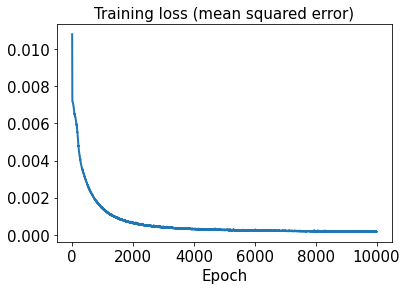

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

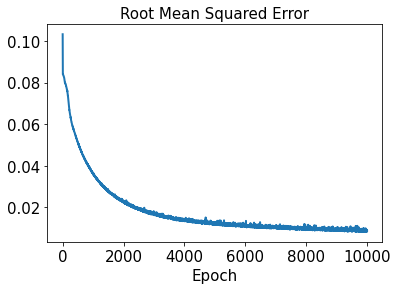

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

19/19 [==============================] - 0s 2ms/step - loss: 8.2416e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.007100278


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.019219453


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.005177799, 0.008020462, 0.010532282, 0.00495867, 0.0055639963, 0.0089047365, 0.0068513337, 0.007711536, 0.0057361173, 0.008884861, 0.00584132, 0.0027218333, 0.008159989, 0.012713719, 0.0102206655, 0.01073083, 0.006474908, 0.0027705624, 0.006542955, 0.0047921697, 0.006215061, 0.0064718034, 0.005731181, 0.008036099, 0.0048870086, 0.0051381807, 0.0048456937, 0.005318472, 0.006193349, 0.012743267, 0.023671018, 0.009307256, 0.018149067, 0.008099218, 0.010142944, 0.0085956585, 0.008304926, 0.005775521, 0.008151812, 0.0080269985, 0.0041488768, 0.006335381, 0.005284559, 0.003963004, 0.006998837, 0.0079841055, 0.0051923026, 0.0075683338, 0.015310637, 0.0062273974, 0.009153982, 0.0043769036, 0.005273183, 0.005139646, 0.0071333414, 0.009650254, 0.0056290072, 0.0046745716, 0.004699871, 0.0073423125, 0.0054644914, 0.0045245253, 0.0076215807, 0.0097674355, 0.007894701, 0.0055587855, 0.005155447, 0.005155654, 0.014783871, 0.0040133367, 0.006756376, 0.007201164, 0.0035588716, 0.00427392, 0.00974146

In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.007952823, 0.021544425, 0.014875777, 0.015654434, 0.020765968, 0.012320131, 0.035594545, 0.01910585, 0.015786057, 0.033340603, 0.01246548, 0.015219986, 0.041431006, 0.015086687, 0.016385248, 0.011032085, 0.012940138, 0.01656251, 0.011425159, 0.018237757, 0.01664336, 0.0142055545, 0.019834833, 0.0100028105, 0.014822231, 0.016749162, 0.039752055, 0.017358012, 0.006714352, 0.016470639, 0.015663732, 0.013724775, 0.024923056, 0.012302292, 0.031892557, 0.01923147, 0.011469959, 0.0181184, 0.0044217263, 0.009682915, 0.036583602, 0.020328527, 0.020363761, 0.020397147, 0.1092766, 0.010239383, 0.0068985266, 0.018751025, 0.016594544, 0.009225337, 0.014875998, 0.009562458, 0.01710446, 0.0084612295, 0.026108544, 0.038821753, 0.016609967, 0.027488966, 0.017997723, 0.011605976, 0.033842843, 0.009894548, 0.008688086, 0.039038997, 0.013090146, 0.030964047]


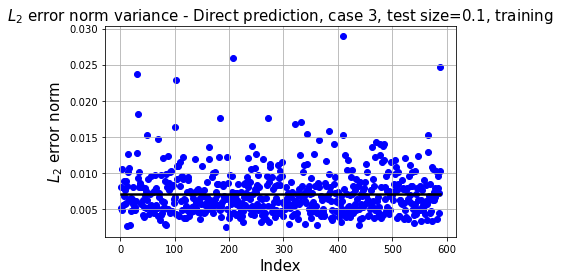

In [42]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 3, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

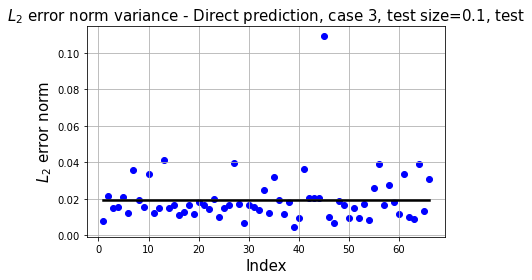

In [43]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 3, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

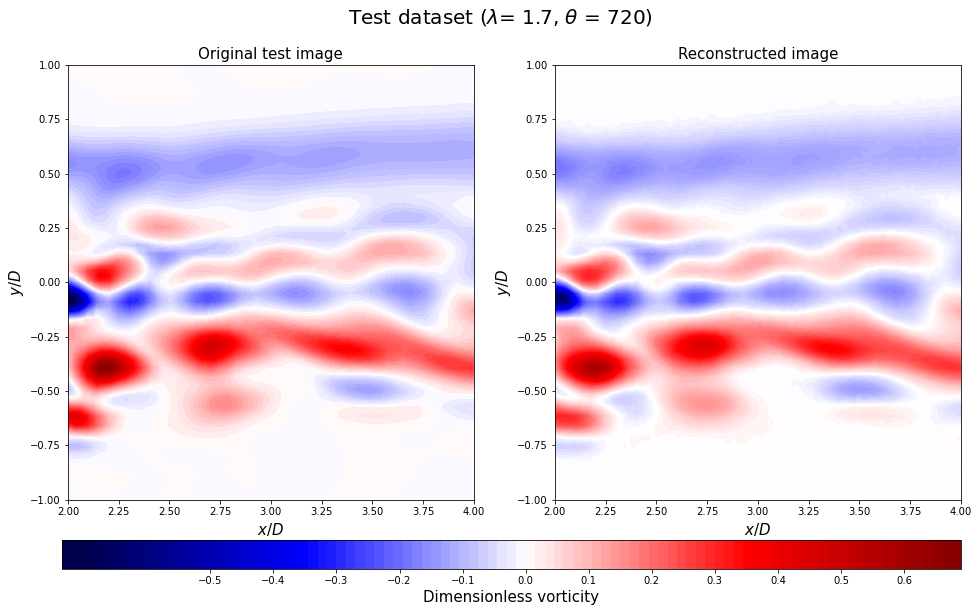

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

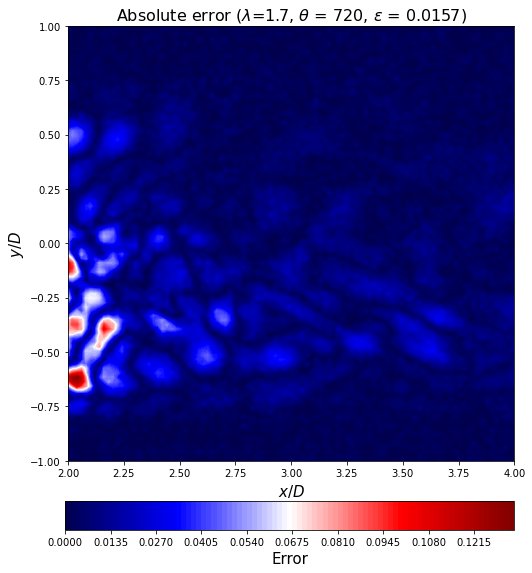

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()